In [24]:
# =========================
# 2. Data Loading and preprocessing
# =========================

# Load the ipc_complete file (main indices per product category)
df_complete = pd.read_csv(
    "C:/Users/Abraham/Documents/Dell/DSTI/Projets Data/Inflation-france/Data/ipc_complete.csv",
    encoding='latin1',
    parse_dates=['Date'],
)
df_complete.set_index('Date', inplace=True)

# Load the ipc_Analyse file (monthly and annual variations)
df_analyse = pd.read_csv(
    "C:/Users/Abraham/Documents/Dell/DSTI/Projets Data/Inflation-france/Data/ipc_Analyse.csv",
    encoding='latin1'
)

# Create a datetime index from year and month, then set as index
df_analyse['Date'] = pd.to_datetime(
    df_analyse['Annee'].astype(str) + '-' + df_analyse['Mois'].astype(str) + '-01'
)
df_analyse.set_index('Date', inplace=True)


In [23]:
# =========================
# 1. Imports & Visualization Setup
# =========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

sns.set_theme(style="darkgrid")
sns.set_palette("viridis")

In [47]:
# =========================
# 3. Exploratory Data Analysis (EDA) & Table Inspection
# =========================

# --- 3.1 Display the first rows of the imported tables ---


from IPython.display import display, HTML

html_code = """
<table border="1" style="border-collapse: collapse; text-align: center; width: 100%;">
  <caption style="font-weight: bold; margin-bottom: 8px;">Lexicon: Column Descriptions</caption>
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Column Name</th>
      <th>Meaning</th>
      <th>Unit</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>IPC, Viandes, ...</td>
      <td>Index value (not a percentage)</td>
      <td>Index value</td>
    </tr>
    <tr>
      <td>Var_IPC_Mens, ...</td>
      <td>Monthly/annual variation</td>
      <td>%</td>
    </tr>
  </tbody>
</table>
"""
display(HTML(html_code))
print(" ")
print("First rows of df_complete:")
display(df_complete.head().round(2))

print("\nFirst rows of df_analyse:")
display(df_analyse.head().round(2))

# --- 3.2 Show missing values in both tables ---
print("\nMissing values in df_analyse:")
display(df_analyse.isnull().sum())

print("\nMissing values in df_complete:")
display(df_complete.isnull().sum())


Column Name,Meaning,Unit
"IPC, Viandes, ...",Index value (not a percentage),Index value
"Var_IPC_Mens, ...",Monthly/annual variation,%


 
First rows of df_complete:


,Periode,IPC,Viandes,Boissons,Autres produits alimentaires,Entretien-hygiène-beauté,Annee,Mois
Date,,,,,,,,
2023-12-01,2023-12,118.39,131.14,119.70,125.92,109.02,2023,12
2023-11-01,2023-11,118.23,131.45,119.78,126.14,109.27,2023,11
2023-10-01,2023-10,118.43,131.24,119.64,126.08,109.34,2023,10
2023-09-01,2023-09,118.26,131.46,119.77,126.24,109.16,2023,9
2023-08-01,2023-08,118.89,131.83,120.43,126.62,110.18,2023,8



First rows of df_analyse:


,Annee,Mois,Var_IPC_Mens,Var_IPC_An,Var_An_Viande,Var_Mens_Viande,Var_An_Boisson,Var_Mens_Boisson,Var_An_Autre_Alim,Var_Mens_Autre_Alim,Var_An_Hygiene,Var_Mens_Hygiene
Date,,,,,,,,,,,,
2023-12-01,2023,12,0.14,3.71,4.60,-0.24,5.99,-0.07,7.59,-0.17,2.55,-0.23
2023-11-01,2023,11,-0.17,3.47,5.51,0.16,6.41,0.12,8.71,0.05,4.06,-0.06
2023-10-01,2023,10,0.14,3.98,6.99,-0.17,7.40,-0.11,10.11,-0.13,5.90,0.16
2023-09-01,2023,9,-0.53,4.90,8.71,-0.28,8.57,-0.55,12.04,-0.30,8.06,-0.93
2023-08-01,2023,8,1.00,4.86,9.42,0.17,9.15,0.30,13.09,0.27,8.32,0.39



Missing values in df_analyse:


Annee                  0
Mois                   0
Var_IPC_Mens           0
Var_IPC_An             0
Var_An_Viande          0
Var_Mens_Viande        0
Var_An_Boisson         0
Var_Mens_Boisson       0
Var_An_Autre_Alim      0
Var_Mens_Autre_Alim    0
Var_An_Hygiene         0
Var_Mens_Hygiene       0
dtype: int64


Missing values in df_complete:


Periode                         0
IPC                             0
Viandes                         0
Boissons                        0
Autres produits alimentaires    0
Entretien-hygiène-beauté        0
Annee                           0
Mois                            0
dtype: int64

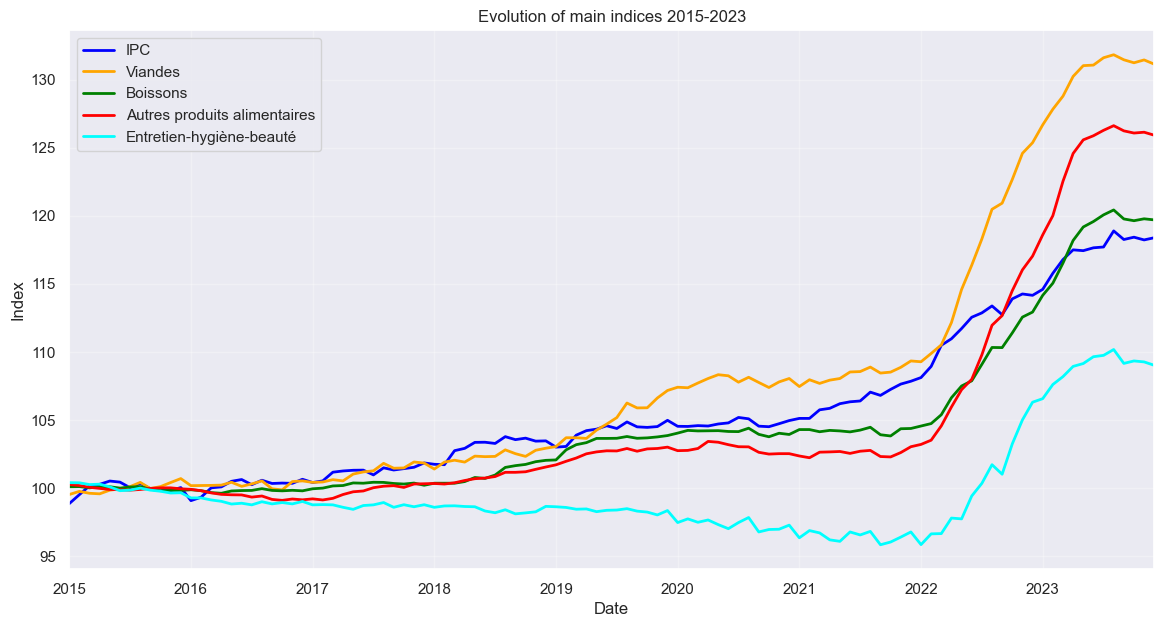

In [43]:

# --- 3.2 Plot the evolution of main indices for each product category ---
plt.figure(figsize=(14, 7))
colors = ['Blue', 'Orange', 'Green', 'red', 'Cyan']  # Set explicit colors for each line
df_complete[['IPC', 'Viandes', 'Boissons', 'Autres produits alimentaires', 'Entretien-hygiène-beauté']].plot(
    lw=2,
    color=colors,
    ax=plt.gca()
)
plt.title('Evolution of main indices 2015-2023')
plt.ylabel('Index')
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.show()


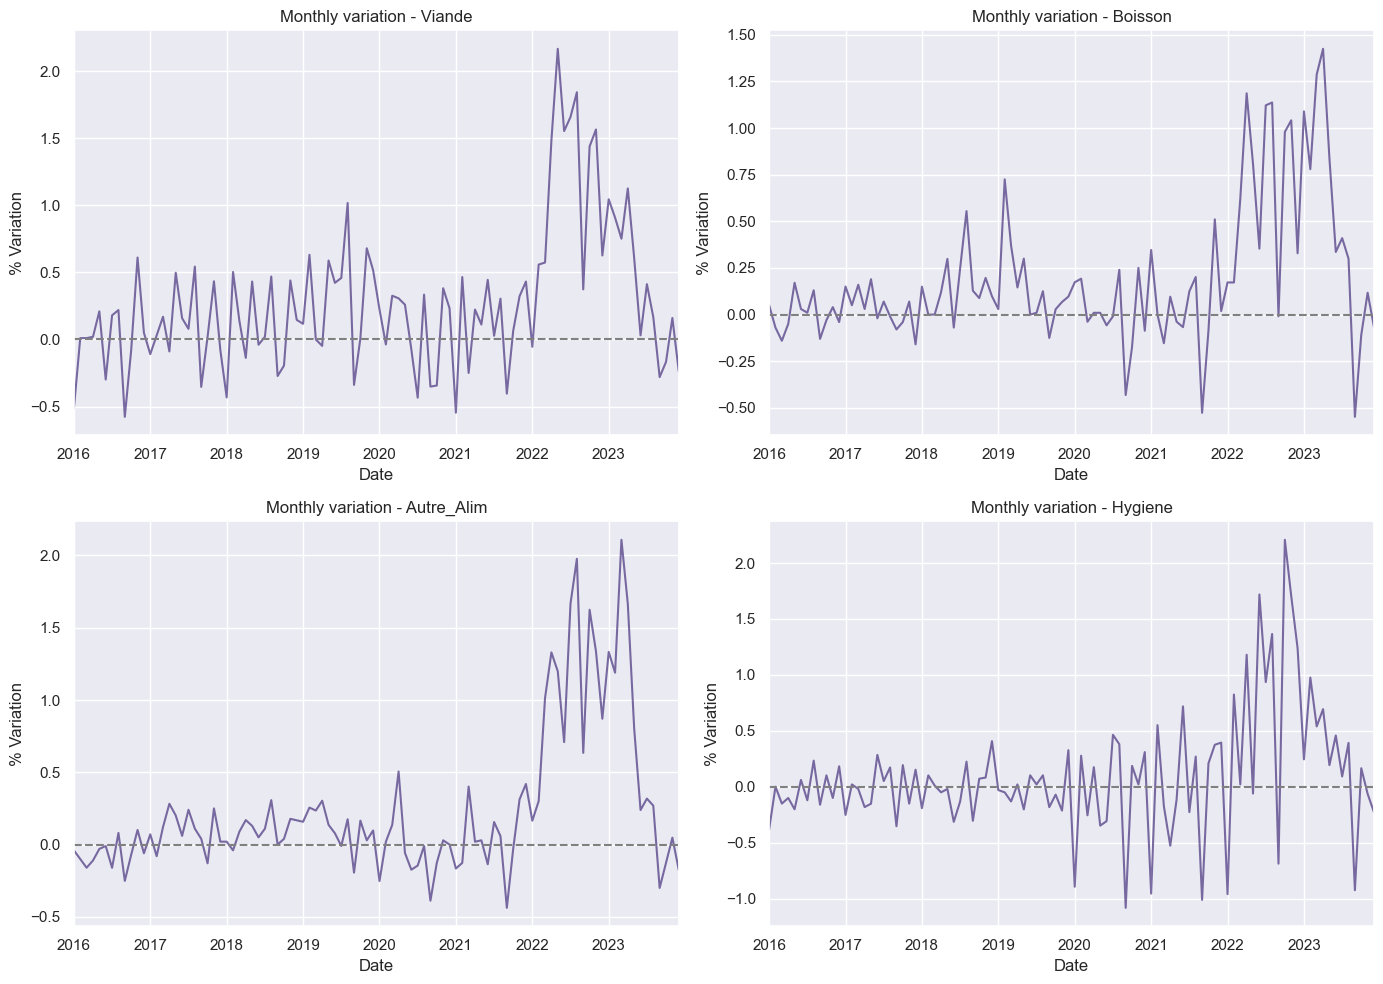

In [35]:
# 3.3 Plot monthly variation for each category in separate subplots
categories = ['Viande', 'Boisson', 'Autre_Alim', 'Hygiene']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, cat in zip(axes.flatten(), categories):
    df_analyse[f'Var_Mens_{cat}'].plot(ax=ax, title=f'Monthly variation - {cat}', alpha=0.7)
    ax.axhline(0, color='grey', ls='--')
    ax.set_ylabel('% Variation')

plt.tight_layout()
plt.show()

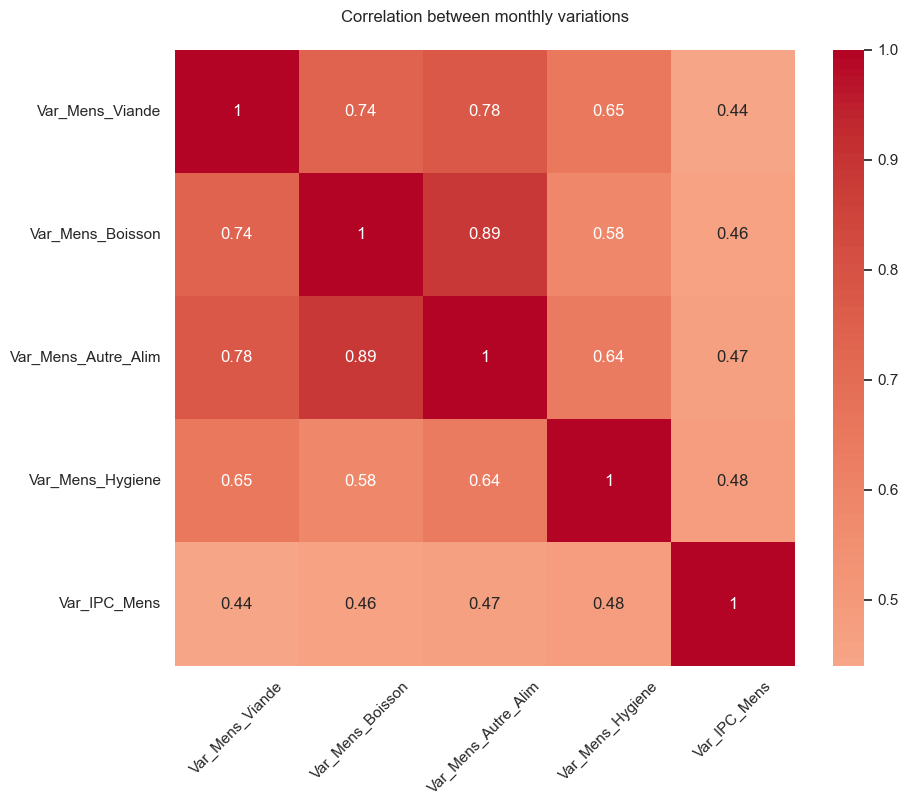


Comment:

The heatmap reveals strong positive correlations between the monthly variations of food-related categories, 
particularly between 'Boisson' and 'Autre_Alim' (0.89), as well as 'Viande' and 'Autre_Alim' (0.78). 
This suggests that these categories tend to move together, possibly due to shared supply chains, 
common input costs, or similar exposure to external shocks like commodity price fluctuations.

In contrast, the correlation between these categories and the general IPC monthly variation is notably lower (around 0.44–0.48). 
This implies that while these subcategories are internally coherent, their price movements are not strongly aligned with the broader inflation index. 
Such a pattern highlights that inflation in these segments may be driven more by sector-specific dynamics 
than by general macroeconomic inflation trends.



In [46]:
# =========================
# 4. Statistical Modeling
# =========================

# Display the correlation heatmap between monthly variations
corr_cols = [col for col in df_analyse.columns if 'Var_Mens' in col] + ['Var_IPC_Mens']
corr_matrix = df_analyse[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', center=0, annot_kws={"size": 12})
plt.title('Correlation between monthly variations', pad=20)
plt.xticks(rotation=45)
plt.show()

comment = """
Comment:

The heatmap reveals strong positive correlations between the monthly variations of food-related categories, 
particularly between 'Boisson' and 'Autre_Alim' (0.89), as well as 'Viande' and 'Autre_Alim' (0.78). 
This suggests that these categories tend to move together, possibly due to shared supply chains, 
common input costs, or similar exposure to external shocks like commodity price fluctuations.

In contrast, the correlation between these categories and the general IPC monthly variation is notably lower (around 0.44–0.48). 
This implies that while these subcategories are internally coherent, their price movements are not strongly aligned with the broader inflation index. 
Such a pattern highlights that inflation in these segments may be driven more by sector-specific dynamics 
than by general macroeconomic inflation trends.
"""
print(comment)


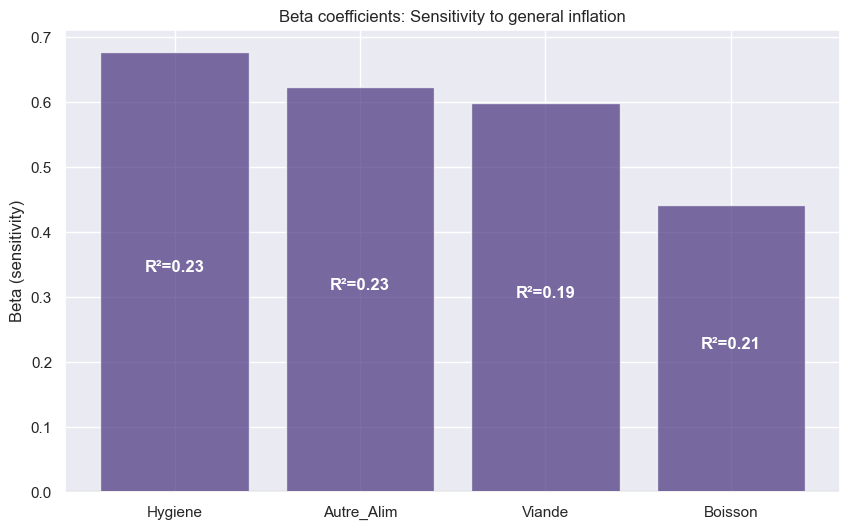

In [41]:
# Linear regression: sensitivity (beta) of each product to general inflation
X = df_analyse[['Var_IPC_Mens']].values
results = {}

for cat in ['Viande', 'Boisson', 'Autre_Alim', 'Hygiene']:
    y = df_analyse[f'Var_Mens_{cat}'].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    results[cat] = {
        'Beta': model.coef_[0][0],
        'R2': model.score(X, y)
    }

df_beta = pd.DataFrame(results).T.sort_values('Beta', ascending=False)

# Bar plot of beta coefficients (sensitivity to inflation)
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df_beta.index, df_beta['Beta'], alpha=0.7)
for i, (_, row) in enumerate(df_beta.iterrows()):
    ax.text(i, row.Beta/2, f"R²={row.R2:.2f}", ha='center', color='white', fontweight='bold')
ax.set_title('Beta coefficients: Sensitivity to general inflation')
ax.set_ylabel('Beta (sensitivity)')
ax.axhline(0, color='grey')
plt.show()



In [42]:
# =========================
# 5. Results & conclusion
# =========================

print("Ranking of products by sensitivity to inflation :")
display(df_beta.round(2).sort_values('Beta', ascending=False))

# Export the results as a CSV file (rounded to 2 decimals)
df_beta.round(2).to_csv('resultats_sensibilite.csv', encoding='utf-8-sig')


conclusion = """
Conclusion:

Hygiene and beauty products show the highest sensitivity to general inflation (β = 0.68),
followed by other food products (β = 0.62), meat (β = 0.60), and beverages (β = 0.44).

This suggests that non-essential or globally sourced goods are more reactive to inflationary shocks,
while staple foods move together but are less directly driven by the general price index.

The moderate R² values (0.19–0.23) indicate that much of the price variation is due to sector-specific factors
or external shocks, not just general inflation.

Future research could explore the role of supply chains, international prices, and consumer behavior
in shaping these sensitivities.
"""
print(conclusion)

Ranking of products by sensitivity to inflation :


,Beta,R2
Hygiene,0.68,0.23
Autre_Alim,0.62,0.23
Viande,0.60,0.19
Boisson,0.44,0.21



Conclusion:

Hygiene and beauty products show the highest sensitivity to general inflation (β = 0.68),
followed by other food products (β = 0.62), meat (β = 0.60), and beverages (β = 0.44).

This suggests that non-essential or globally sourced goods are more reactive to inflationary shocks,
while staple foods move together but are less directly driven by the general price index.

The moderate R² values (0.19–0.23) indicate that much of the price variation is due to sector-specific factors
or external shocks, not just general inflation.

Future research could explore the role of supply chains, international prices, and consumer behavior
in shaping these sensitivities.

